In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': '0.6.2', 'qiskit-finance': '0.3.4', 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('fb335ef56b1d6d43894ad997ae54daf329de8050cda1e2e7a795f9bcae2da2e84ad903bd320d6e1354214371bcf9af7a80c1ccc1e0a546947469913805528928')

C:\Users\Minnu\AppData\Local\Temp\ipykernel_21464\4281302606.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('fb335ef56b1d6d43894ad997ae54daf329de8050cda1e2e7a795f9bcae2da2e84ad903bd320d6e1354214371bcf9af7a80c1ccc1e0a546947469913805528928')
configrc.store_credentials:WARNING:2023-09-01 11:44:50,855: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
import qiskit as q
%matplotlib inline
circuit=q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

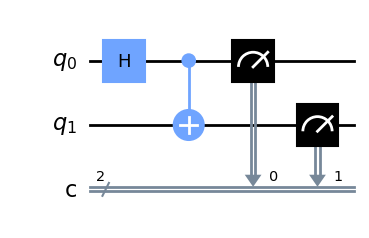

In [7]:
circuit.draw(output="mpl")

In [8]:
from qiskit import IBMQ


In [9]:
provider=IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count=len(backend.properties().qubits)
    except:
        qubit_count="simulated"
        print(f"{backend.name()}has{backend.status().pending_jobs}queued and␣{qubit_count}qubits")

ibmq_qasm_simulatorhas0queued and␣simulatedqubits
simulator_statevectorhas0queued and␣simulatedqubits
simulator_mpshas0queued and␣simulatedqubits
simulator_extended_stabilizerhas0queued and␣simulatedqubits
simulator_stabilizerhas0queued and␣simulatedqubits


In [ ]:
from qiskit.tools.monitor import job_monitor
backend=provider.get_backend("ibmq_lima")
job=q.execute(circuit,backend=backend,shots=1024)
job_monitor(job)

Job Status: job is queued (None)

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])

In [ ]:
backend=provider.get_backend("ibmq_qasm_simulator")
circuit=q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()

In [ ]:
job=q.execute(circuit,backend=backend,shots=1024)
job_monitor(job)


In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])

In [ ]:
from qiskit import Aer
sim_backend=Aer.get_backend("qasm_simulator")
for backend in Aer.backends():
    print(backend)

In [ ]:
job=q.execute(circuit,backend=sim_backend,shots=1024)
job_monitor(job)

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])


In [ ]:
from qiskit import *
circuit=QuantumCircuit(3,3)
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_state_qsphere

In [ ]:
# QFT
# Initialize the 3-qubit quantum circuit
# Set the state '110'
s = '110'
num_qubits = len(s)
qc = QuantumCircuit(num_qubits)

In [ ]:
# Set reverse ordering
s = s[::-1]

In [ ]:
# Construct the state 110
for idx in range(num_qubits):
    if s[idx] == '1':
        qc.x(idx)
qc.barrier()
qc.draw()


In [ ]:
circuit.draw(output='mpl')

In [ ]:
# Import the value pi for our rotations
from numpy import pi
# Always start from the most significant qubit,
# in this case it's q2.
# Step 1, add a Hadamard gate
qc.h(2)

In [ ]:
# Step 2, add CROT gates from most significant qubit
qc.cu1(pi/2,1,2)

In [ ]:
# Step 3, add another CROT from 2 to the next qubit down,
# while doubling the phase denominator
qc.cu1(pi/4, 0, 2)
# Draw the circuit
qc.draw()

In [ ]:
# Now that we finished from 2 down to 0
# We'll drop to the next least significant qubit and
# start again,
# Step 1, add a Hadamard gate
qc.h(1)


In [ ]:
# Step 2, add Control Rotation (CROT) gates from most
# significant towards
# least significant starting a pi/2, and doubling the
# denominator
# as you go down each qubit.
qc.cu1(pi/2, 0, 1)
# Draw the circuit
qc.draw()
# Now that we finished from 1 down to 0
# We'll drop to the next least significant qubit and 
# Start again

In [ ]:
# Step 1, add a Hadamard gate
qc.h(0)
# Since we are at the least significant qubit, we are
# done!
# Draw the circuit
qc.draw()

In [ ]:
# Define a function which will add the swap gates to the 
# outer
# pair of qubits
def add_swap_gates(qc_swaps,qubits):
    for qubit in range(qubits//2):
        qc-swaps.swap(qubit, qubit-qubit-1)
    return qc_swaps

In [ ]:
qft_circuit=add_swap_gates(qc, num, qubits)
qft_circuit.draw()

In [ ]:
 # Get the state vector simulator to view our final QFT
# state
backend = Aer.get_backend("statevector_simulator")
# Execute the QFT circuit and visualize the results
statevector = execute(qft_circuit,backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
plot_state_qsphere(statevector)
